   nome_aluno      disciplina  nota1  nota2  nota3  frequencia  media  \
0    Aluno 39          Python      3      9      4          62    5.3   
1    Aluno 29             PHP      1      2      1          14    1.3   
2    Aluno 15              C#      9      6      9          96    8.0   
3    Aluno 43        Big Data      2      2      5          24    3.0   
4    Aluno 08       Front-end      0      1      4          16    1.7   
5    Aluno 21       Front-end      7      9      5          96    7.0   
6    Aluno 39        Big Data      2      3      0          65    1.7   
7    Aluno 19            .NET      9      7      4          77    6.7   
8    Aluno 23        Back-end      6      8      8          52    7.3   
9    Aluno 11  Cibersegurança      9      6      9          50    8.0   
10   Aluno 11       Front-end      4      0      1          38    1.7   
11   Aluno 24            Java      9      2      0          50    3.7   
12   Aluno 36       Front-end      4      8      9 

<ipython-input-3-dd13f5fe0dcc>:66: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot([edados['nota1'], edados['nota2'], edados['nota3'], edados['media']],


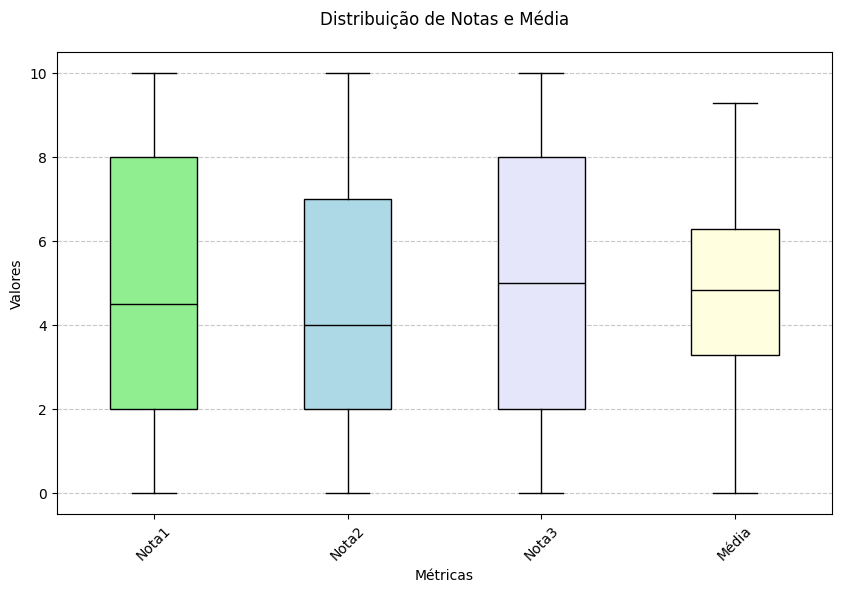

<ipython-input-3-dd13f5fe0dcc>:88: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box1 = plt.boxplot([ edados['frequencia']], # Removed edados['situacao']


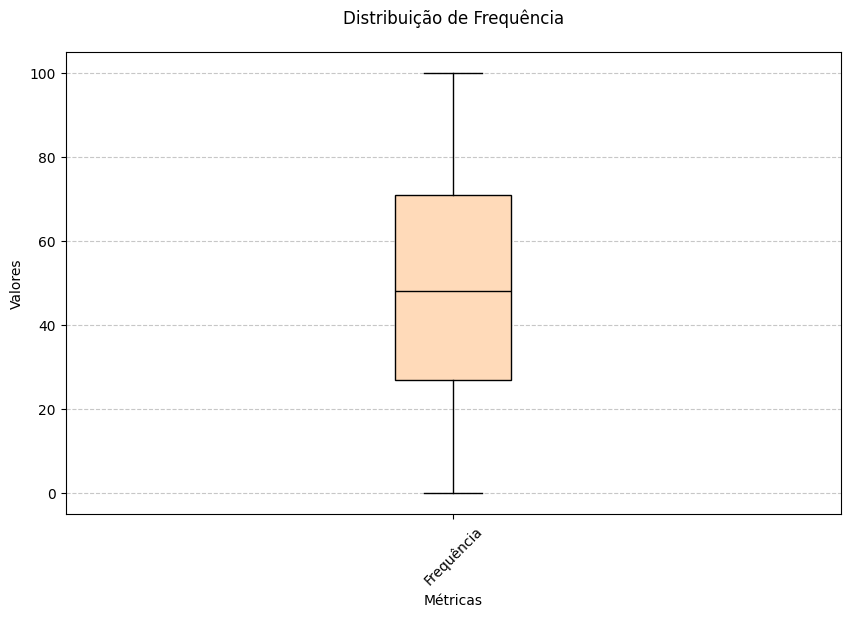

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1 - criação de dados
np.random.seed(42)
alunos = [f'Aluno {i+1:02d}' for i in range(50)]
disciplinas = ['Front-end', 'Back-end', 'Cibersegurança', 'Big Data', 'Java', 'Python','.NET', 'PHP', 'C#']

edados = {
    'nome_aluno': np.random.choice(alunos, size=200),
    'disciplina': np.random.choice(disciplinas, size=200),
    'nota1': np.random.randint(0, 11, size=200).round(1),
    'nota2': np.random.randint(0, 11, size=200).round(1),
    'nota3': np.random.randint(0, 11, size=200).round(1),
    'frequencia': np.random.randint(0, 101, size=200).round(1)
}
edados['media'] = ((edados['nota1'] + edados['nota2'] + edados['nota3']) / 3).round(1)
edados['situacao'] = np.where(edados['media'] >= 6, 'Aprovado', 'Reprovado')

# 2 - Criação do DataFrame
df_alunos = pd.DataFrame(edados)

# 3 - Exibição do DataFrame
print(df_alunos.head(50))

# 4 - Análise descritiva
def analise_descritiva(edados, nota):
  print(f"\n=== Análise Descritiva - {nota} ===")
  print(f"Média: {np.mean(edados):.4f}")
  print(f"Mediana: {np.median(edados):.4f}")
  print(f"Desvio Padrão: {np.std(edados):.4f}")
  print(f"Variância: {np.var(edados):.4f}")
  print(f"Valor Mínimo: {np.min(edados):.4f}")
  print(f"Valor Máximo: {np.max(edados):.4f}")

  q1, q2, q3 = np.percentile(edados, [25, 50, 75])
  iqr = q2 - q1
  limite_inferior = q1 - 1.5 * iqr
  limite_superior = q3 + 1.5 * iqr

  print("\n Medidas de Posição:")
  print(f"Q1 (25%): {q1:.4f}")
  print(f"Q2/Mediana (50%): {q2:.4f}")
  print(f"Q3 (75%): {q3:.4f}")
  print(f"IQR: {iqr:.4f}")

  print("\n Limites para Outliers:")
  print(f"Limite Inferior: {limite_inferior:.4f}")
  print(f"Limite Superior: {limite_superior:.4f}")

  outliers = [x for x in edados if x < limite_inferior or x > limite_superior]
  print(f"Outliers Detectados: {outliers}")

#aplicando análise descritiva
analise_descritiva(edados['nota1'], "Nota 1")
analise_descritiva(edados['nota2'], "Nota 2")
analise_descritiva(edados['nota3'], "Nota 3")
analise_descritiva(edados['frequencia'], "Frequência") # Also apply descriptive analysis to frequency
analise_descritiva(edados['media'], "Média") # Also apply descriptive analysis to mean

# 5 - Gráficos
#Boxplot Comparativo - retorno de quartis
plt.figure(figsize=(10, 6))
# Remove the non-numeric 'situacao' data from the boxplot input
box = plt.boxplot([edados['nota1'], edados['nota2'], edados['nota3'], edados['media']],
            # Adjust labels to match the data provided
            labels=["Nota1", "Nota2", "Nota3", "Média"],
            patch_artist=True,
            medianprops=dict(color='black'))

# Customização de cores
# Adjust colors list to match the number of boxplots
colors = ['lightgreen', 'lightblue', 'lavender', 'lightyellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Distribuição de Notas e Média', pad=20) # Update title for clarity
plt.ylabel('Valores') # Update ylabel
plt.xticks(rotation=45)
plt.xlabel('Métricas') # Update xlabel
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Boxplot Comparativo - retorno de quartis
plt.figure(figsize=(10, 6))
# Remove the non-numeric 'situacao' data from the boxplot input
box1 = plt.boxplot([ edados['frequencia']], # Removed edados['situacao']
            # Adjust labels to match the data provided
            labels=["Frequência"], # Adjusted labels
            patch_artist=True,
            medianprops=dict(color='black'))

# Customização de cores
# Adjust colors list to match the number of boxplots
colors = ['peachpuff'] # Adjusted colors list
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Distribuição de Frequência', pad=20) # Update title for clarity
plt.ylabel('Valores') # Update ylabel
plt.xticks(rotation=45)
plt.xlabel('Métricas') # Update xlabel
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
'''CRIAR CORRELAÇÃO ENTRE ALUNOS COM LINHA DE TENDÊNCIA e DISTRIBUIÇÃO DE FREQUÊNCIA
- Notas e médias *
- Notas e Disciplinas
- Notas e Frequencia
- Média e Frequencia *
- Média e Disciplinas
- Média e Situação
- Frequencia e Disciplinas
- Frequencia e Situação

acompanhar valores de amplitude e curtose para frente
'''




'CRIAR CORRELAÇÃO ENTRE ALUNOS COM LINHA DE TENDÊNCIA\n- Notas e médias\n- Notas e Disciplinas\n- Notas e Frequencia\n- Média e Frequencia\n- Média e Disciplinas\n- Média e Situação\n- Frequencia e Disciplinas \n- Frequencia e Situação\n- Disciplinas e Situação\n'

Ignorando linha de tendência para dados não numéricos: Disciplina e Média
A Correlação não é aplicável para dados não numéricos: Disciplina e Média
Ignorando linha de tendência para dados não numéricos: Média e Situação
A Correlação não é aplicável para dados não numéricos: Média e Situação


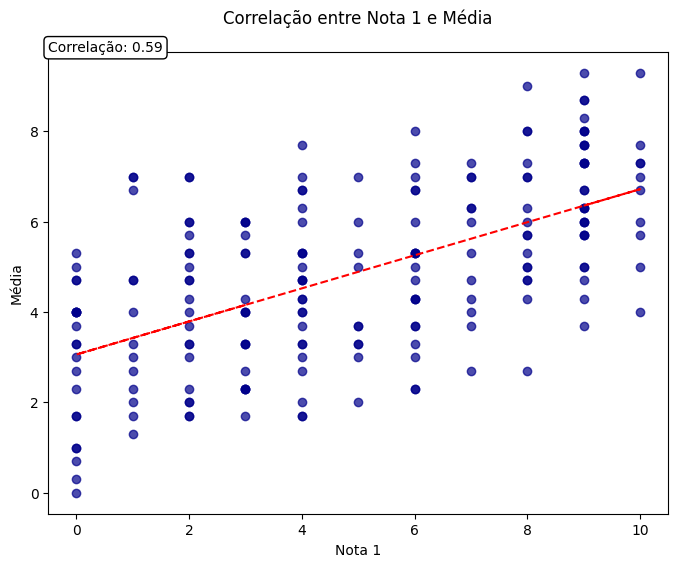

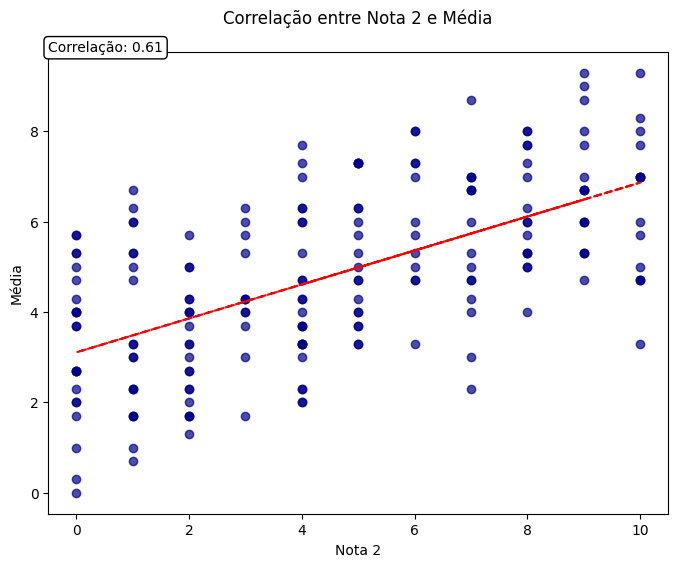

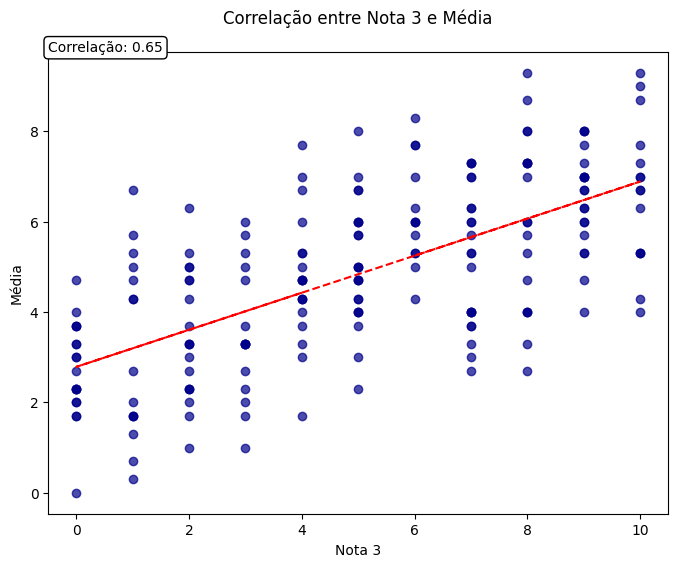

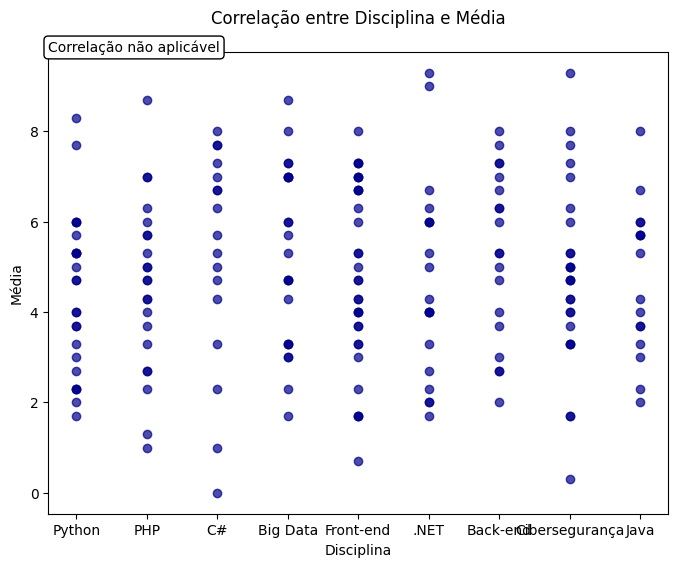

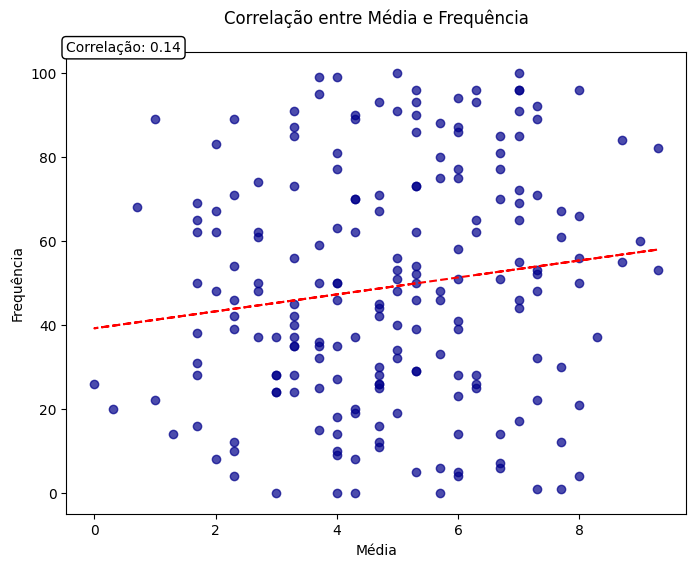

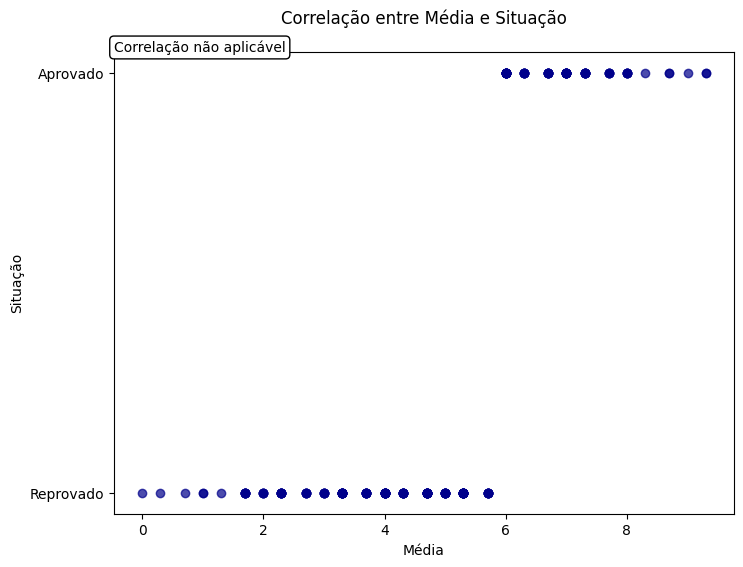

In [ ]:
# Matriz de correlação escolar
def plot_correlacao2(dados3,dados4,nome3,nome4):
  plt.figure(figsize=(8, 6))
  plt.scatter(dados3, dados4, color='darkblue', alpha=0.7)

  #Linha de tendência
  # Ensure both inputs are numerical before attempting polyfit
  if np.issubdtype(dados3.dtype, np.number) and np.issubdtype(dados4.dtype, np.number):
      r = np.polyfit(dados3, dados4, 1)
      s = np.poly1d(r)
      plt.plot(dados3, s(dados3), 'r--')
  else:
      print(f"Ignorando linha de tendência para dados não numéricos: {nome3} e {nome4}")

  plt.title(f'Correlação entre {nome3} e {nome4}', pad=20)
  plt.xlabel(f"{nome3}")
  plt.ylabel(f"{nome4}")

  # Calculate correlation only if both inputs are numerical
  if np.issubdtype(dados3.dtype, np.number) and np.issubdtype(dados4.dtype, np.number):
    correlacao2 = np.corrcoef(dados3, dados4)[0, 1]
    plt.annotate(f'Correlação: {correlacao2:.2f}',
                 xy=(0.00, 1.00), xycoords='axes fraction',
                 bbox=dict(boxstyle='round', fc='w'))
  else:
      # Add a note if correlation is not applicable
      plt.annotate('Correlação não aplicável',
                   xy=(0.00, 1.00), xycoords='axes fraction',
                   bbox=dict(boxstyle='round', fc='w'))
      print(f"A Correlação não é aplicável para dados não numéricos: {nome3} e {nome4}")

# Gerando gráficos de Correlação
plot_correlacao2(edados['nota1'], edados['media'], "Nota 1", "Média")
plot_correlacao2(edados['nota2'], edados['media'], "Nota 2", "Média")
plot_correlacao2(edados['nota3'], edados['media'], "Nota 3", "Média")
plot_correlacao2(edados['disciplina'], edados['media'], "Disciplina", "Média")
plot_correlacao2(edados['media'], edados['frequencia'], "Média", "Frequência")
plot_correlacao2(edados['media'], edados['situacao'], "Média", "Situação")

In [ ]:
'''Assimetria e Curtose escolar - notas, media, frequencia, situacao.'''

In [ ]:
#Distribuições simétrica e assimétrica
assimetria1 = df_alunos['nota1'].skew()
assimetria2 = df_alunos['nota2'].skew()
assimetria3 = df_alunos['nota3'].skew()
assimetria4 = df_alunos['media'].skew()
assimetria5 = df_alunos['frequencia'].skew()

In [ ]:
#Distribuições simétrica e assimétrica

if -0.5 <= assimetria1 <= 0.5:
    print('A distribuição Nota 1 é simétrica')
elif assimetria1 > -0.5:
    print('A distribuição Nota 1 é assimétrica positiva')
else:
    print('A distribuição Nota 1 é assimétrica negativa')

A distribuição Nota 1 é simétrica


In [ ]:
#Distribuições simétrica e assimétrica

if -0.5 <= assimetria2 <= 0.5:
    print('A distribuição Nota 2 é simétrica')
elif assimetria2 > -0.5:
    print('A distribuição Nota 2 é assimétrica positiva')
else:
    print('A distribuição Nota 2 é assimétrica negativa')

A distribuição Nota 2 é simétrica


In [ ]:
if -0.5 <= assimetria3 <= 0.5:
    print('A distribuição Nota 3 é simétrica')
elif assimetria3 > -0.5:
    print('A distribuição Nota 3 é assimétrica positiva')
else:
    print('A distribuição Nota 3 é assimétrica negativa')

A distribuição Nota 3 é simétrica


In [ ]:
if -0.5 <= assimetria4 <= 0.5:
    print('A distribuição de Média é simétrica')
elif assimetria4 > -0.5:
    print('A distribuição de Média é assimétrica positiva')
else:
    print('A distribuição de Média é assimétrica negativa')

A distribuição de Média é simétrica


In [ ]:
if -0.5 <= assimetria5 <= 0.5:
    print('A distribuição de Frequência é simétrica')
elif assimetria5 > -0.5:
    print('A distribuição de Frequência é assimétrica positiva')
else:
    print('A distribuição de Frequência é assimétrica negativa')

A distribuição de Frequência é simétrica


In [ ]:
#Curtoses
curtose1 = df_alunos['nota1'].kurtosis()
curtose2 = df_alunos['nota2'].kurtosis()
curtose3 = df_alunos['nota3'].kurtosis()
curtose4 = df_alunos['media'].kurtosis()
curtose5 = df_alunos['frequencia'].kurtosis()

#Condições de curtoses a seguir:

In [ ]:
if 2.5 <= curtose1 <= 3.5:
    print('A distribuição Nota 1 é MESOCÚRTICA')
elif curtose1 < 2.5:
    print('A distribuição Nota 1 é PLATIOCÚRTICA')
else:
    print('A distribuição Nota 1 é LEPTOCÚRTICA')

A distribuição Nota 1 é PLATIOCÚRTICA


In [ ]:
if 2.5 <= curtose2 <= 3.5:
    print('A distribuição Nota 2 é MESOCÚRTICA')
elif curtose2 < 2.5:
    print('A distribuição Nota 2 é PLATIOCÚRTICA')
else:
    print('A distribuição Nota 2 é LEPTOCÚRTICA')

A distribuição Nota 2 é PLATIOCÚRTICA


In [ ]:
if 2.5 <= curtose3 <= 3.5:
    print('A distribuição Nota 3 é MESOCÚRTICA')
elif curtose3 < 2.5:
    print('A distribuição Nota 3 é PLATIOCÚRTICA')
else:
    print('A distribuição Nota 3 é LEPTOCÚRTICA')

A distribuição Nota 3 é PLATIOCÚRTICA


In [ ]:
if 2.5 <= curtose4 <= 3.5:
    print('A distribuição de Média é MESOCÚRTICA')
elif curtose4 < 2.5:
    print('A distribuição de Média é PLATIOCÚRTICA')
else:
    print('A distribuição de Média é LEPTOCÚRTICA')

A distribuição de Média é PLATIOCÚRTICA


In [ ]:
if 2.5 <= curtose5 <= 3.5:
    print('A distribuição de Frequência é MESOCÚRTICA')
elif curtose5 < 2.5:
    print('A distribuição de Frequência é PLATIOCÚRTICA')
else:
    print('A distribuição de Frequência é LEPTOCÚRTICA')

A distribuição de Frequência é PLATIOCÚRTICA
